In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# Importul datelor si vizualizarea lor

In [ ]:
from sklearn.datasets import make_circles

# Crearea a 1000 de puncte
n_samples=1000

#Crearea cercurilor
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


In [ ]:
#Verificarea lui X
X[:]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Verificarea lui y
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#vizualizarea datelor in tabel
import pandas as pd
circles=pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


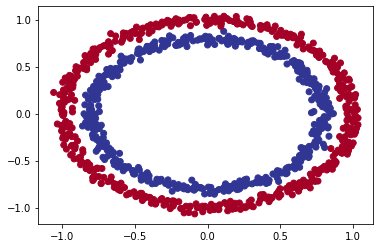

In [ ]:
#vizualizarea datelor in grafic
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

# Forma datelor de la intrare si de la iesire

In [ ]:
# verificarea formelor datelor de la intrare si de la iesire
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# vizualizarea lungimii seturilor
len(X), len(y)

(1000, 1000)

In [ ]:
# vizualizarea primelor valori din seturi
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Pasii din modelare

1. **Crearea modelului** - se adauga si se conectaza toate nvelel retelei  (utlizand [functional](https://www.tensorflow.org/guide/keras/functional) sau [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) sau importul unui model elaborat anterior (cunscut ca transfer learning).
2. **Compilarea modelului** - definirea modalitatilor de masurarea a performantelor modelului (loss/metrics) si a modlaitatilor de imbunatatile a acestor performante (optimizer). 
3. **Implementarea modelului** - utilizarea modelului la detectarea modelului din cadrul datelor (cum datele `X` devin `y`)


In [ ]:
# setarea random seed
tf.random.set_seed(42)

# 1. Crearea modelului utilizand Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compilarea modelului
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary deoarece se lucreaza cu 2 clase (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Implementarea modelului
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


Acuratetie este de 0.48 deci aproape ca un model de ghicire

---



In [ ]:
# Trainnig modelului de mai multe ori
model_1.fit(X, y, epochs=200, verbose=0) # setarea verbose=0 pentru a nu vizualiza toate etapele de training
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Acuratetie ramane de  0.5 caracteristica unui model de ghicire

In [ ]:
# Setarea random sedd
tf.random.set_seed(42)

# 1. Crearea modelului cu un nivel în plus
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # adaugarea unui nivel
  tf.keras.layers.Dense(1) 
])

# 2. Compilarea modelului
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Implementarea modelului
model_2.fit(X, y, epochs=100, verbose=0) 

In [ ]:
# Evaluarea modelului
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

Acuratetie ramane de 0.5 caracteristica unui model de ghicire

# Îmbunatățirea modelului

![diferite optiuni de imbunatatire a modelului](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)



Îmbunatatirea modelului prin adaugare mai multori neuroni, adugarea unui nou nivel si modificarea optimizatorului in Adam

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# 1. Crearea modelului
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # adaugarea a 100 de neuroni
  tf.keras.layers.Dense(10), # adaugarea unui nival cu 10 neuroni
  tf.keras.layers.Dense(1)
])

# 2. Compilarea modelului
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # utilizarea Adam în locul lui SGD
                metrics=['accuracy'])

# 3. Implementarea modelului
model_3.fit(X, y, epochs=100, verbose=0) 

In [ ]:
# Evaluarea modelului
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

Acuratetie ramane de 0.5 caracteristica unui model de ghicire

Pentru vizualizarea predictiilor modelului se va crea o functie  `plot_decision_boundary()` care:
* va avea drept date de intrare modelul, caracteristicile (`X`) si etichetele (`y`).
* va crea un [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) pentru diferite valori a lui `X.
* va realiza predictia în acest meshgrid.
* va crea graficul cu predictii precum si linia de separare a zonelor de predictie

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Afiseaza graficul cu limitele de decizie pentru modelul ce realizeaza predictia pe datele X.
  """
  # definirea limitelor axelor graficului si crearea meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Crearea valorilor lui X  (se va prezice pe baza acestor valori)
  x_in = np.c_[xx.ravel(), yy.ravel()] # combinarea celor 2 array-uri bidimensionale impreuna: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Realizarea predictiei utilizand modelul
  y_pred = model.predict(x_in)

  # Verificarea prezentei claselor multiple
  if len(y_pred[0]) > 1:
    print("Clasificarea multi clase...")
    # Este necesara modificarea formei datelor predictiei pentru a pute fi afisate pe grafic
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Clasificarea binara...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Afisarea graficului
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Clasificarea binara...


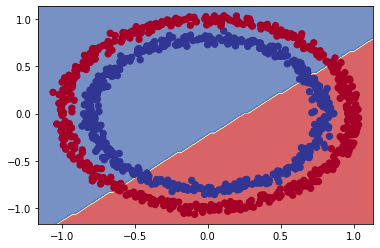

In [ ]:
# Verificarea preditiilor realizate cu modelul model_3 
plot_decision_boundary(model_3, X, y)

# Piesa lipsă: Ne-liniaritatea

Pentru a întelege efectele neliniaritătii se va analiza comportamentul retelei neuronale cu ajutorul  [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true). Apoi se aplica practic cele observate

În continuare se va introduce notiune de activation

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 nivel ascuns cu activare liniara
  tf.keras.layers.Dense(1) # nivel de ieșire
])

# Compilarea modelului
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" scurtatura pentru "learning rate"
                metrics=["accuracy"])

# Implementarea modelului
history = model_4.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluarea modelului
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.4860


[0.7177660465240479, 0.4860000014305115]

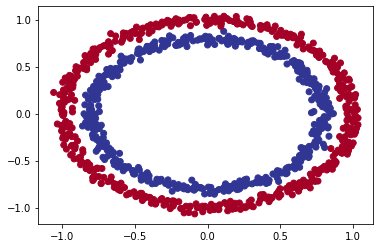

In [ ]:
#revizualizarea datelor in grafic
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

Clasificarea binara...


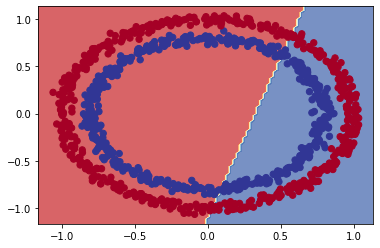

In [ ]:
# Verificarea preditiilor realizate cu modelul model_4 
plot_decision_boundary(model_4, X, y)

Din grafic se observa ca functia liniara de activare creaza o limita liniara între clase si nu poate asifura o acuratete inaltă

Se repeta elaborarea modelului cu utilizarea functie de activare `relu`

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # 1 nivel ascuns cu activare relu
  tf.keras.layers.Dense(1) # nivel de ieșire
])

# Compilarea modelului
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Implementarea modelului
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

In [ ]:
# Evaluarea modelului
model_5.evaluate(X, y)

32/32 [==============================] - 0s 989us/step - loss: 0.6932 - accuracy: 0.5000


[0.6931846141815186, 0.5]

Clasificarea binara...


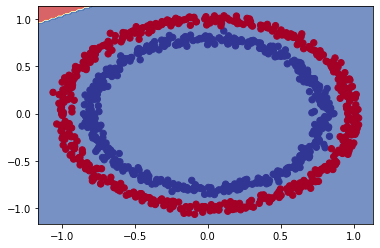

In [ ]:
# Verificarea preditiilor realizate cu modelul model_5 
plot_decision_boundary(model_5, X, y)

Din grafic se observa ca toate rezultatele predictie vor fi identice

Se includ 2 nivele ascunse a cate 4 neuroni fiecare si activare relu

In [ ]:
# Setare random seed
tf.random.set_seed(42)

# Crearea modelului
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # nivel ascuns 1, 4 neuroni, activare ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neuroni, activare ReLU
  tf.keras.layers.Dense(1) # nivel de iesire
])

# Compilarea modelului
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Implementarea modelului
history = model_6.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluarea modelului
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Clasificarea binara...


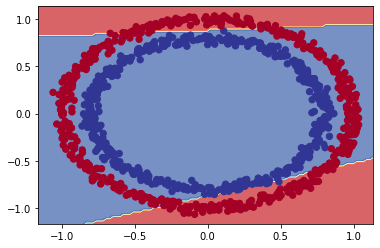

In [ ]:
# Verificarea preditiilor realizate cu modelul model_6 
plot_decision_boundary(model_6, X, y)

Rezultatele prezentate in grafic nu corespund necesitatilor si acest lucreu este cauzat de lipsa functie de activare in nivelul de iesire

Se va repeta elaborarea modelului cu introducerea activarii de tip `sigmoid` pentru nivelul de iesire

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # nivel ascuns 1, activare ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # nivel ascuns 2, activare ReLU
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # nivel de iesire, activare sigmoid
])

# Compilarea modelului
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Implementarea modelului
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluarea modelului
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Clasificarea binara...


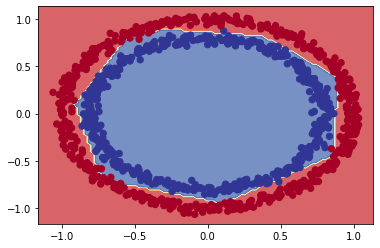

In [ ]:
# Verificarea preditiilor realizate cu modelul model_7 
plot_decision_boundary(model_7, X, y)

Rezultatele predictiei cu modelul 7 sunt foarte bune si acest lucru datorita introducerii neliniaritatii, adica a functiilor de activare. Mai multe despre functiile de activare se poate gasi [adresa](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#)

# Evaluare si imbunatatirea modelului

In [ ]:
# verificarea numarului de date din set
len(X)

1000

In [ ]:
# Divizarea datelor in setul de training si setul de test
X_train, y_train = X[:800], y[:800] # 80% din date vor fi setul de training
X_test, y_test = X[800:], y[800:] # 20% din date vor fi setul de test

# verificare formelor seturilor
X_train.shape, X_test.shape 

((800, 2), (200, 2))

Se creaza un model care se va implementa pe datele de training si se va testa pe datele de test

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului (asemanator cu model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compilarea modelului
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Implementarea modelului
history = model_8.fit(X_train, y_train, epochs=25)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
# Evaluarea modelului pe datele de test
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set: 0.1246885135769844
Model accuracy on the test set: 100.00%


Clasificarea binara...
Clasificarea binara...


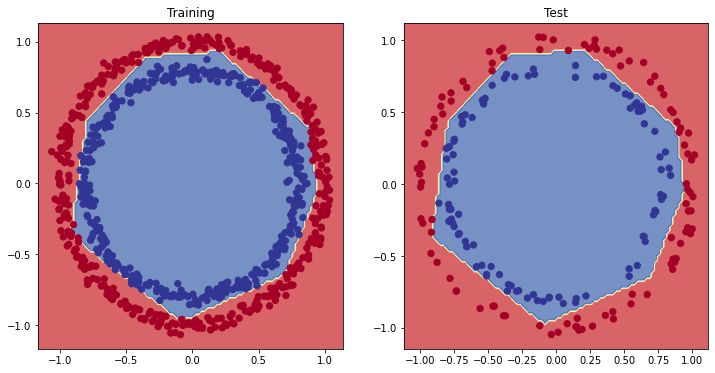

In [ ]:
# Afisarea limitelor de dcizie pentru datele de trainig si datele de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Curba pierderilor

Pentru a vedea cum performantele sistemului se imbunatatesc la fiecare trecere a datelor prin reteua neuronala (la fiecare `epoch`) se elaboreaza curba pierderilor (loss curve) numita si curba de invatare (learning curve)

Pentru a elabora curba pierderilor se utilizeaza variabila `history` care contine datele returnate de metoda `fit()` utilizata la implementarea modelului.

Cu atributul `history` a acestei varibile se obtin datele despre pierderi si acuratete




In [ ]:
# accesara datelor variabilei history cu ajutorul atributului history
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Curba pierderilor pentru modelul model_8')

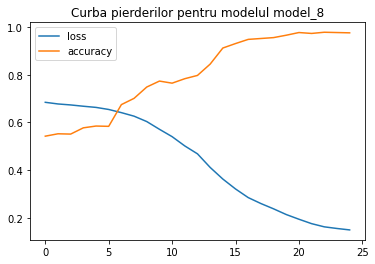

In [ ]:
# Vizualizarea grafica a curbei pierderilor
pd.DataFrame(history.history).plot()
plt.title("Curba pierderilor pentru modelul model_8")

## Deteminarea valorii ideale a learning rate

Crearea unui model ce va contine si un callback pentru learning rate

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea unui model identic modelului model_8
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compilarea modelului
model_9.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"]) 

# Crearea unui planificator callback pentru learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # se aplica un set de valor pentru learning rate ce incepe de la 1e-4 si creste cu 10**(epoch/20) la fiecare epoch

# implementarae modelului cu aplicare planificatorului callback
history_9 = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

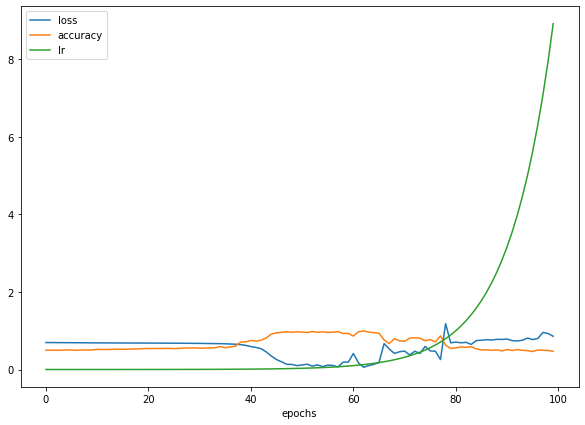

In [ ]:
# Vizualizarea grafica a curbei pierderilor pentru modelul model_9
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

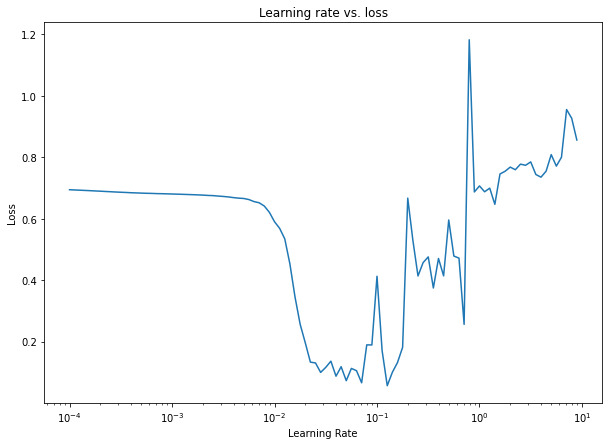

In [ ]:
# Vizualizareae dependetei learning rate de pierderi
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) # axa x (learning rate) va avea scara logaritmica
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Valoarea ideala a lui learning rate se alege de pe portiune descrescatoare a dependente dar nu valoarea unde curba coboara cel mai jos (aproximativ de 10 mai mica decat valoarea unde curba ia minimum)

In cazul graficului de mai sus cea mai ideala valoarea este 0,02

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compilarea modelului cu valoarea learning rate ideala
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), 
                metrics=["accuracy"])

# Implementarea m,odelului cu 20 epochs 
history = model_10.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
# Evaluarea modelui pe datele de test
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Clasificarea binara...
Clasificarea binara...


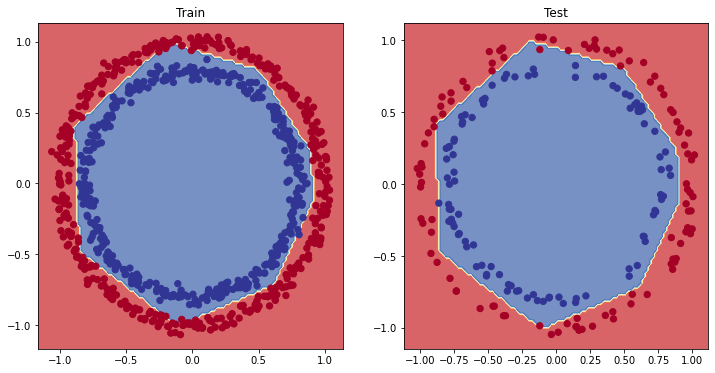

In [ ]:
# Afisarea limitelor de dcizie pentru datele de trainig si datele de test
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## Alte metode de evaluare a modelului de clasificare

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

In [ ]:
# Verificarea acuratetei modelului model_10
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test set: 0.05740184709429741
Model accuracy on test set: 99.00%


In [ ]:
# Realizarea predictiei
y_preds = model_10.predict(X_test)

In [ ]:
# Vizualizarea primelor 10 valori ale predictiilor
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [ ]:
# Vizualizarea primelor 10 valor adevarate
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
# Exemplu de conversia probabilitatilor de predictie in valori binare
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Elaborarea confusion matrix utilizand metoda [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
# Crearea confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Crearea unei functii de afisare a confusion matrix mai interactiva

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
 
  # Crearea confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalizara lor
  n_classes = cm.shape[0] # determinarea numarului de clase

  # Personalizarea matricii
  fig, ax = plt.subplots(figsize=figsize)

  # crearea graficului matricii
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # crearea claselor
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Etichetele axelor
  ax.set(title="Confusion Matrix",
         xlabel="Datele prezise",
         ylabel="Datele adevarate",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Fixarea axei x in partea de jos
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Setarea pragului diferitor culori
  threshold = (cm.max() + cm.min()) / 2.

  # Afisarea textului in fiecare celula
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

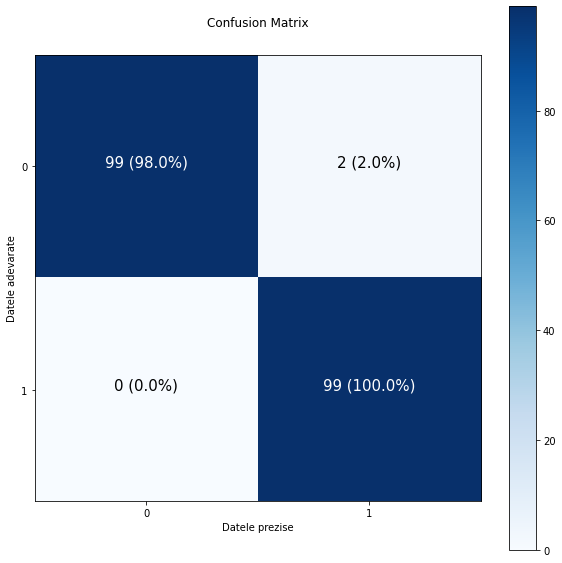

In [ ]:
# Apelara luctie de creare a confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=tf.round(y_preds))

# Clasificarea multiclase

In [ ]:
# importul datelor
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Datele sunt deja divizate in seturi de training si seturi de test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Vizualizarea primului set de training
print(f"Imaginea de training:\n{train_data[0]}\n") 
print(f"Eticheta de training: {train_labels[0]}")

Imaginea de training:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

In [ ]:
# Verificarea formelor tutror seturirlor de date
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Verificarea formelor primului set de training
train_data[0].shape, train_labels[0].shape

((28, 28), ())

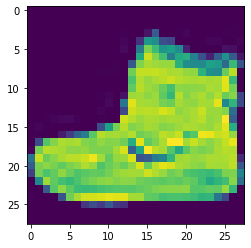

In [ ]:
# Vizualziarea grafica a imaginii primului set de training
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Verificarea etichetei primului set
train_labels[0]

9

Etichetele tuturor seturilor sunt reprezentate prin numere intregi de la 0 la 9. Pentru a fi mai clara valoarea acestor, se va forma o lista cu toate etichetele in format textual conform datelor de pe [pagina GitHub](https://github.com/zalandoresearch/fashion-mnist#labels)

In [ ]:
class_names = ['Tricou', 'Pantaloni', 'Pulover', 'Rochie', 'Palton', 
               'Sandale', 'Camasa', 'Adidasi', 'Geanta', 'Bocanci']

In [ ]:
# Numarul total al claselor
len(class_names)

10

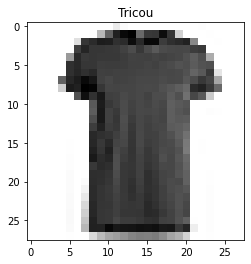

In [ ]:
# Afisarea unei imagini cu eticheta sa
plt.imshow(train_data[17], cmap=plt.cm.binary) # culoarea se schimba in alb-negru
plt.title(class_names[train_labels[17]]);

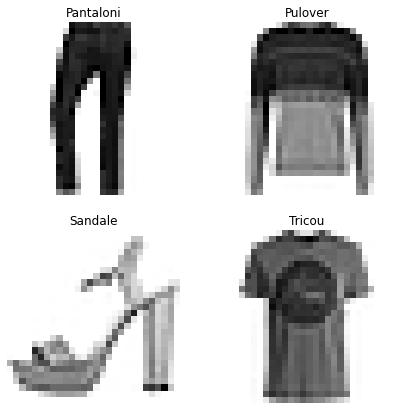

In [ ]:
# Afisarea mai multor imagini aliatoare cu etichetele lor
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Se elaboreaza modelul de predictie a imaginilor consideranduse urmatoarele modificari:
- Se introduce un nivel de intrare de tip Flatten care area rolul de a transforma dimesiunile 28x28 in 784 de pixeli
- Nivelul de iesire va avea 10 neuroni deoarece sunt 10 clase de clasificare a imaginilor
- Se modifica functia de activare a nivelului de iesire in functie de tip [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)
- Se modifica functia de cost (loss function) in tipul [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) cand etichetele sunt in format intreg sau in tipul [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) cand etichetele sunt in format one-hot encoder
- se introduce si parametrul `validation_data` in metoda de training `fit()`

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # nivvelde intrarea (rearanjarea 28x28 in 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # numarul neuronilor la iesire este 10, functia de activare softmax
])

# Compilarea modelului
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # dfunctia de cost pentru clasificarea multiclas cu etichete intregi
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Implementarea modelului
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # arata cum cum functioneaza modelul pe setul de test

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Verificarea modelului
model_11.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_60 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_61 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Verificarea valorilor min si max in setul de training
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# se normeaza datele divizandu-se toate datele la valoarea maxima
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
# Verificarea valorilor min si max in setul de training normalizat
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

Se creaza din nou modelul dar deja se realizeaza treningul pe datele normate

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # nivvelde intrarea (rearanjarea 28x28 in 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # numarul neuronilor la iesire este 10, functia de activare softmax
])

# Compilarea modelului
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # dfunctia de cost pentru clasificarea multiclas cu etichete intregi
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Implementarea modelului
norm_history = model_11.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Construirea curbelor de pierderi pentru modelul cu date norma si cu date ne-normate

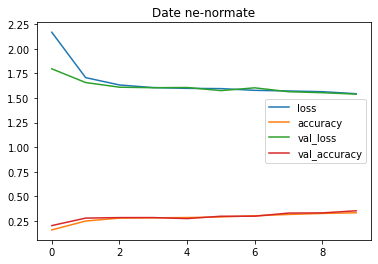

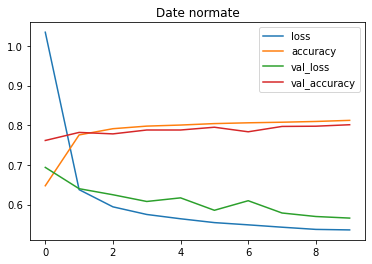

In [ ]:
import pandas as pd
# Afisarea curbe de pierdere pentru datele ne-normate
pd.DataFrame(non_norm_history.history).plot(title="Date ne-normate")
# Afisarea curbe de pierdere pentru datele normate
pd.DataFrame(norm_history.history).plot(title="Date normate");

Pentru determinarea valorii ideale a learning rate se redefineste modelul cu un callback

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compilarea modelului
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Crearea planificatorului callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Implementarea modelului
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40, 
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

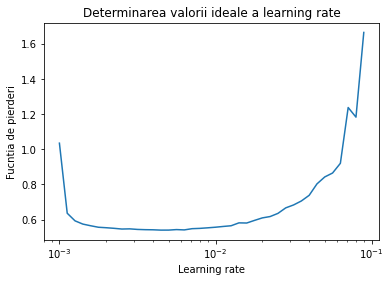

In [ ]:
# Vizualizarea dependentei functiei de peirderi de learning rate
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # x va fi scara logaritmica
plt.xlabel("Learning rate")
plt.ylabel("Fucntia de pierderi")
plt.title("Determinarea valorii ideale a learning rate");

In acet caz, se observa ca valoarea ideala a learning rate este in aproierea valorii implicite a functie de optimizarea [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`).

Se reconstruieste modelul deja cu valoarea ideala a learning rate

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compilarea modelului
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # valoarea ideala learning rate (identica valorii implicite)
                 metrics=["accuracy"])

# Implementarea modelului
history = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
# Realizarea predictiei cu ajutorul modelului model_14
y_probs = model_14.predict(test_data_norm)

In [ ]:
# Vizualizarea primelor 5 predictii
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
# detectarea indexului probabilitatii maxime pentru prima valoare prezisa
y_probs[0].argmax()

9

In [ ]:
# Determinarea clasei ce corespunde indexului probabilitatii maxime pentru prima valoare prezisa
class_names[y_probs[0].argmax()]

'Bocanci'

In [ ]:
# detectarea indecsilori probabilitatii maxime pentru taote valorile prezise
y_preds = y_probs.argmax(axis=1)

In [ ]:
# Vizualizarea indecsilor probabilitatilor maxijme pentru primele 10 valori prezise
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# Elaborarea confusion matrix in forma textuala
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

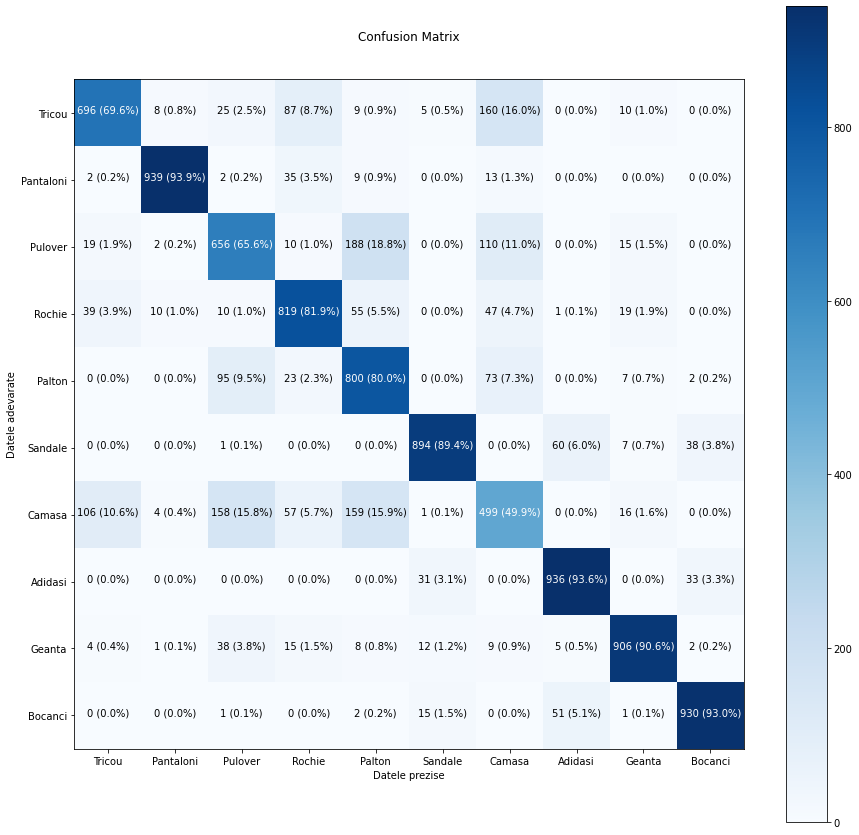

In [ ]:
# Elaborarea confusion matrix in forma grafica
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Crearea unei functii ce va permite afisarea aleatoare a imaginii ]mpreuna cu predictia acesteai

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Selecteaza o imagine aletore ai o afiseza cu eticheta prezisa si eticheta adevarata.
  """ 
  # selectarea unui numar intreg aleator
  i = random.randint(0, len(images))
  
  # Crearea predictiei si a etichetelor
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) 
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Afisarea imaginii
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Schimbarea culorii titlului in functie de predictie (corecta sau gresita)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Adaugarea informatie pe axa x (eticheta adevarata/prezisa)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

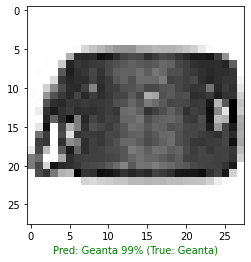

In [ ]:
# Selectarea aliatoare a unie imagin si vuza;izarea ei impreuna cu eticheta prezisa
plot_random_image(model=model_14, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

# 🛠  Neural network classification with TensorFlow Exercises

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*
3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

# 📖 Neural network classification with TensorFlow Extra-curriculum

* Watch 3Blue1Brown's neural networks video 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). After you're done, write 100 words about what you've learned.
  * If you haven't already, watch video 1: [*But what is a Neural Network?*](https://youtu.be/aircAruvnKk). Note the activation function they talk about at the end.
* Watch [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.
* Spend 1-hour reading [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).
* Read the [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Which one is your favourite?
  * After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".